# Caso 2: Recomendaciones de Productos

Objetivo: Proporcionar recomendaciones personalizadas a los clientes basadas en su historial de compras y preferencias.

- Dataset: Online Retail

- Descripción:Este dataset contiene transacciones de una tienda online que vende productos de regalos para todos los públicos. Incluye información sobre productos, cantidad comprada, precio, y más.

# 1 Preprocesamiento de Datos

- 1.1  Importacion y Carga de datos

In [3]:
import pandas as pd
import seaborn as sns

In [5]:
# Carga de datos
archivo_datos = '../datos/Online Retail.xlsx'
df = pd.read_excel(archivo_datos)

- 1. 2 Eliminar filas con datos flotantes

Nos aseguramos de que no haya valores nulos que puedan afectar el análisis.

In [6]:
df = df.dropna(subset=['Description'])
print()

Se eliminan las filas que no tienen descripción del producto para garantizar que se trabaja con datos completos.

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Eliminamos cualquier fila que no tenga descripción del producto para garantizar que trabajamos con datos completos.

- 1.3 Verificar el tipo de datos y filtrar filas donde 'Description' sea una cadena de texto


Usamos la función apply con una lambda para verificar si cada valor en la columna 'Description' es una cadena de texto.

Filtramos el DataFrame para mantener solo las filas donde 'Description' es una cadena de texto

In [8]:

df = df[df['Description'].apply(lambda x: isinstance(x, str))]
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

- 1.4 Crear una nueva caracteristicas

Longitud del texto de la descripción del producto.

Añadimos una nueva columna al dataset que contiene la longitud del texto de cada descripción. Esto nos puede ayudar a agrupar productos basándonos en cuánto escriben los usuarios.

In [9]:
df['description_length'] = df['Description'].apply(len)
print(df)


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0     

# 2 Analisis Exploratorio de Datos (EDA)

- 2.1 Explorar los datos: Ver algunas estadísticas básicas y distribuciones.

Revisamos estadísticas básicas de los datos, como la longitud promedio de las descripciones y el precio medio.

In [10]:
print(df.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  540454.000000                         540454  540454.000000   
mean        9.603887  2011-07-04 16:20:24.736425216       4.623528   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:49:00       1.250000   
50%         3.000000            2011-07-20 11:38:00       2.080000   
75%        10.000000            2011-10-19 11:49:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.007088                            NaN      96.889717   

          CustomerID  description_length  
count  406829.000000       540454.000000  
mean    15287.690570           26.643820  
min     12346.000000            1.000000  
25%     13953.000000           23.000000  
50%     15152.000000           27.000000  
75%     16791.000000           31.000000  
max     18287.000000           35.000000  
std      1713.600303     

# Paso 3 Clustering 

- 3.1 Seleccionar características para clustering: Utilizar la longitud del texto de la descripción y el precio del producto.

Seleccionamos las características que utilizaremos para agrupar los productos.

In [ ]:
X = df[['description_length', 'UnitPrice']]
print(X)


        description_length  UnitPrice
0                       34       2.55
1                       19       3.39
2                       30       2.75
3                       35       3.39
4                       30       3.39
...                    ...        ...
541904                  27       0.85
541905                  28       2.10
541906                  29       4.15
541907                  31       4.15
541908                  29       4.95

[540454 rows x 2 columns]


- 3.2 Aplicar K-Means: Agrupar productos en 5 clusters.

Usamos el algoritmo k-Means para agrupar productos en 5 clusters basándonos en la longitud del texto de las descripciones y el precio del producto.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)


- 3.3 Visualizar los Clusters: Crear un scatter plot para visualizar los clusters.

Visualizamos los clusters para entender mejor cómo se agrupan los productos basándonos en las características seleccionadas.

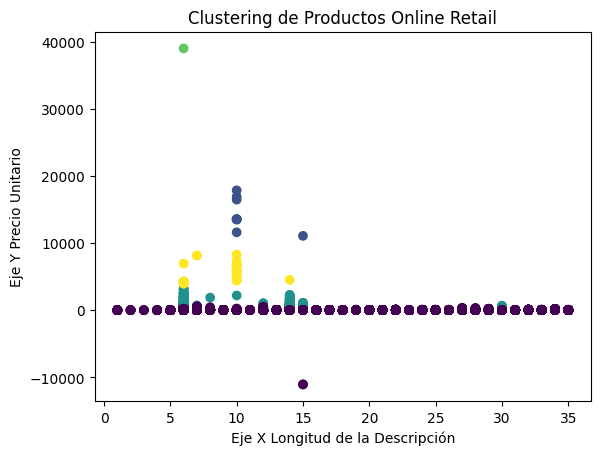

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X['description_length'], X['UnitPrice'], c=df['cluster'], cmap='viridis')
plt.xlabel('Eje X Longitud de la Descripción')
plt.ylabel('Eje Y Precio Unitario')
plt.title('Clustering de Productos Online Retail')
plt.show()


- Eje X (horizontal): Longitud de la Descripción:
Este eje representa la cantidad de caracteres o palabras que tiene la descripción de cada producto.
Valores más altos en este eje significan descripciones de productos más extensas.
- Eje Y (vertical): Precio Unitario:
Este eje muestra el precio de cada producto individual.
Valores más altos en este eje indican productos más caros.

# 4 PCA (Análisis de Componentes Principales)

- 4.1 Reducción de dimensionalidad: Utilizar PCA para reducir la dimensionalidad de los datos

Usamos PCA para reducir la dimensionalidad de los datos y visualizarlos en un espacio de 2 dimensiones, manteniendo la mayor cantidad de información posible.

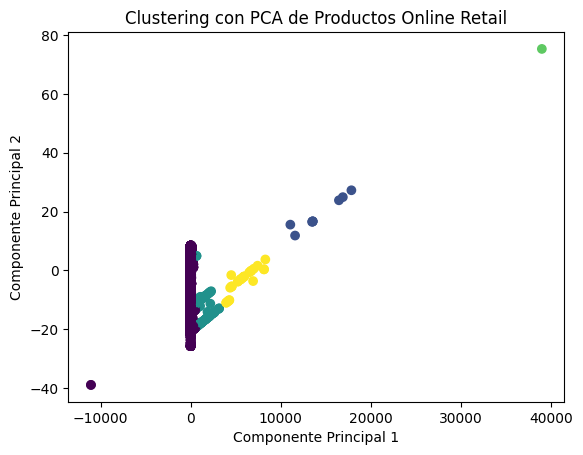

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering con PCA de Productos Online Retail')
plt.show()


Conclusión sobre el uso de K-Means y PCA en la Recomendación de Productos

Para realizar recomendaciones personalizadas, se utiliza K-Means para agrupar clientes según su comportamiento de compra. Este enfoque permite identificar patrones y segmentar clientes con características similares, lo que ayuda a ofrecer productos más relevantes.

El Análisis de Componentes Principales (PCA) se utilizó para reducir la dimensionalidad de los datos, eliminando redundancias y mejorando la eficiencia del modelo sin perder información clave. Esto facilitó la visualización y optimizó el desempeño del algoritmo de clustering.

Los resultados mostraron que la segmentación de clientes mediante K-Means es una estrategia efectiva para la recomendación de productos, permitiendo crear estrategias de marketing más personalizadas. Sin embargo, se podrían explorar otros métodos como modelos basados ​​en aprendizaje profundo para mejorar la precisión de las recomendaciones.